In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/xgj/spdk/exp-0219/plot")
from utils import *
import pandas as pd
import shutil
import os
import itertools

In [7]:
res_dir = "/home/xgj/fio-out"

keywords = ["64k", "OP_15", "zipf:1.1"]

result_files = []

for res_file in os.listdir(res_dir):
    flag = True
    for keyword in keywords:
        if keyword not in res_file:
            flag = False
    if flag:
        res_file_path = os.path.join(res_dir, res_file)
        result_files.append(res_file_path)

result_files.sort()

print(len(result_files))
print("\n".join(result_files))

IO_ITEMS = ["USER", "COMPACTION", "BASE_MD", "NVC_MD", "L2P"]

8
/home/xgj/fio-out/ALGO_mida22_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_mida24_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_mida44_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_mida46_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_sepbit22_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_sepbit24_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_sepbit44_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out
/home/xgj/fio-out/ALGO_sepbit46_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1.job.out


In [8]:
def plot_io(result_file, metric, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    read_metric_dict = {}
    write_metric_dict = {}
    for item in IO_ITEMS:
        stat = extract_stat_io(result_file, item)
        read_metric_dict[item] = stat[f"read_{metric}"]
        write_metric_dict[item] = stat[f"write_{metric}"]

    read_metric_df = pd.DataFrame(read_metric_dict)
    write_metric_df = pd.DataFrame(write_metric_dict)
    read_metric_df.to_csv(os.path.join(save_dir, f"read_{metric}.csv"))
    read_metric_df = read_metric_df[int(0.1*read_metric_df.shape[0]):int(0.9*read_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    read_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"read_{metric}.pdf"))
    write_metric_df.to_csv(os.path.join(save_dir, f"write_{metric}.csv"))
    write_metric_df = write_metric_df[int(0.1*write_metric_df.shape[0]):int(0.9*write_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    write_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"write_{metric}.pdf"))
    

In [9]:
def plot_stat_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    stat = extract_stat_waf(result_file)
    stat_df = pd.DataFrame(stat)
    stat_df.to_csv(os.path.join(save_dir, "stat_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    stat_df.plot()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    plt.savefig(os.path.join(save_dir, "stat_waf.pdf"))

In [10]:
def plot_overall_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    waf, final_waf = extract_overall_waf(result_file)
    stat_df = pd.DataFrame(waf)
    stat_df.to_csv(os.path.join(save_dir, "overall_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    stat_df.plot()
    plt.savefig(os.path.join(save_dir, "overall_waf.pdf"))
    return waf, final_waf

/home/xgj/miniconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


                                               param  IOPS  BW(MB/S)  \
0   ALGO_mida22_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1  3148     197.0   
1   ALGO_mida24_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1  3266     204.0   
2   ALGO_mida44_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1  3169     198.0   
3   ALGO_mida46_cb_BS_64k_WP_rand_OP_15_DIS_zipf:1.1  2981     186.0   
4  ALGO_sepbit22_cb_BS_64k_WP_rand_OP_15_DIS_zipf...  3121     195.0   
5  ALGO_sepbit24_cb_BS_64k_WP_rand_OP_15_DIS_zipf...  3129     196.0   
6  ALGO_sepbit44_cb_BS_64k_WP_rand_OP_15_DIS_zipf...  2873     180.0   
7  ALGO_sepbit46_cb_BS_64k_WP_rand_OP_15_DIS_zipf...  2978     186.0   

    latency  final_waf  
0  40660.07     1.3845  
1  39184.88     1.4102  
2  40390.22     1.4120  
3     42.94     1.4053  
4  41008.00     1.3842  
5     40.91     1.3942  
6  44551.18     1.3741  
7  42974.14     1.3948  


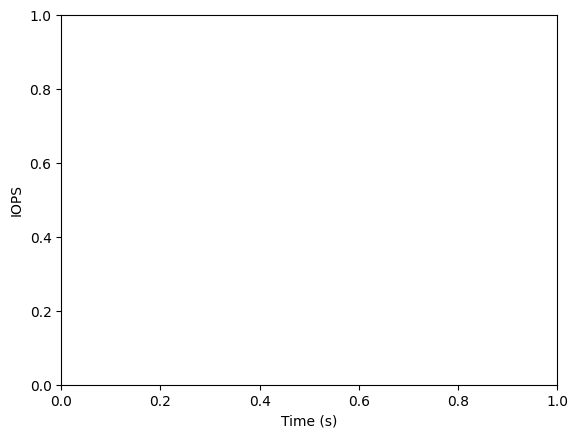

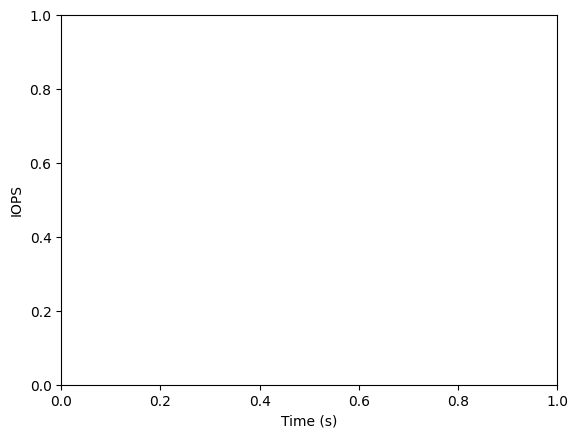

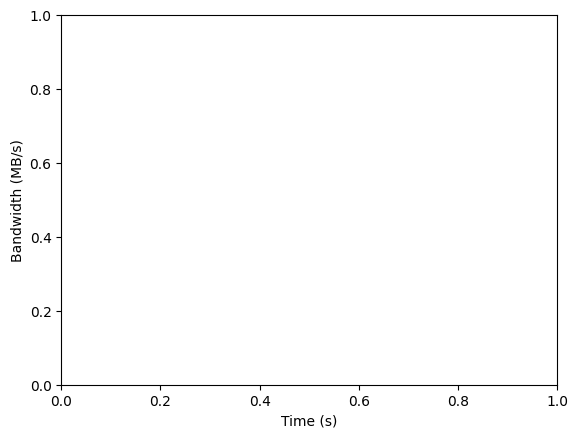

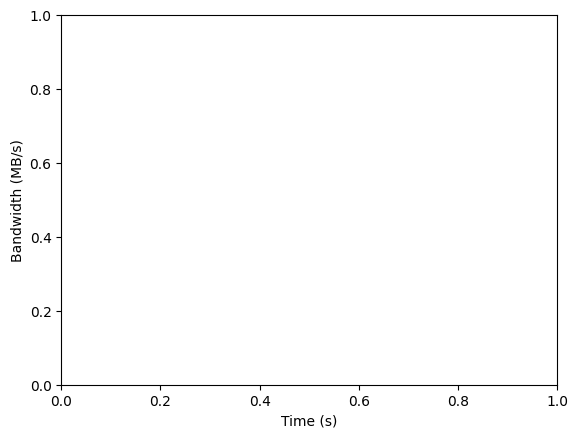

<Figure size 640x480 with 0 Axes>

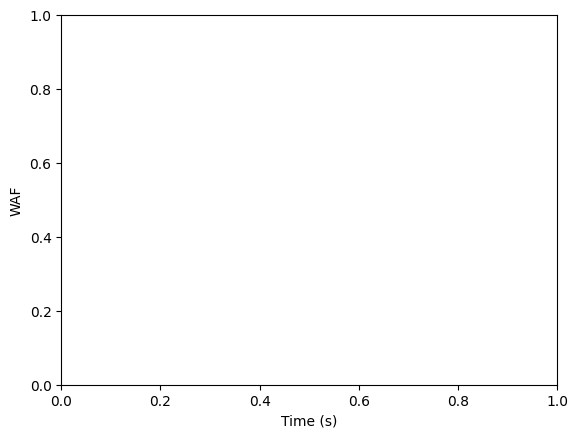

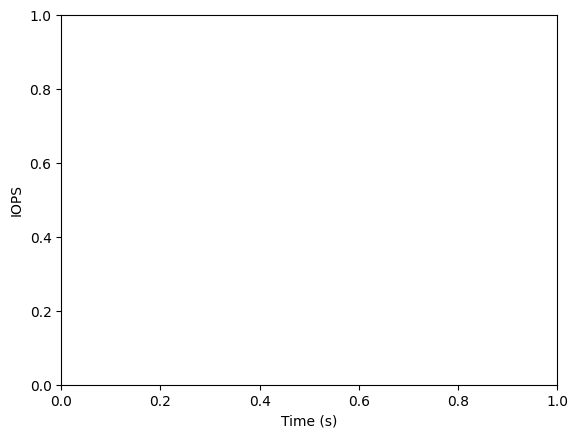

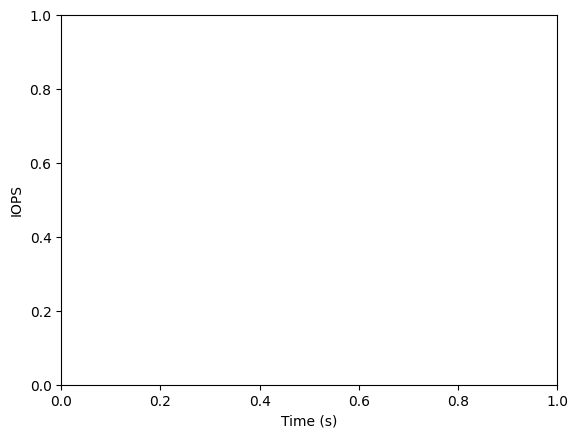

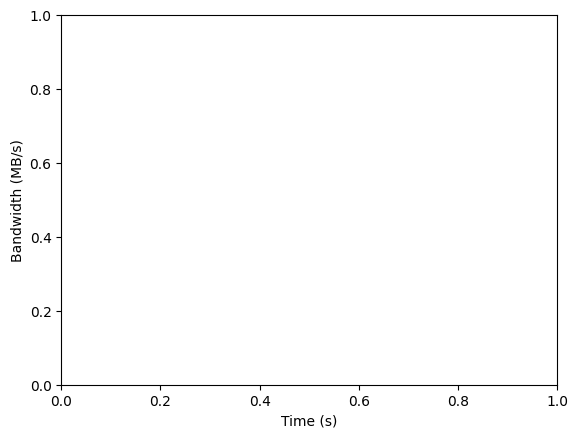

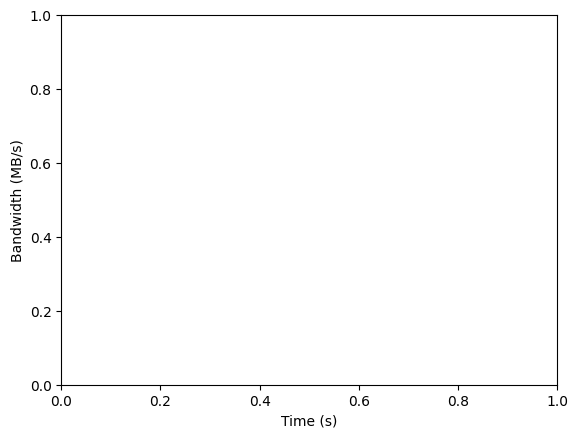

<Figure size 640x480 with 0 Axes>

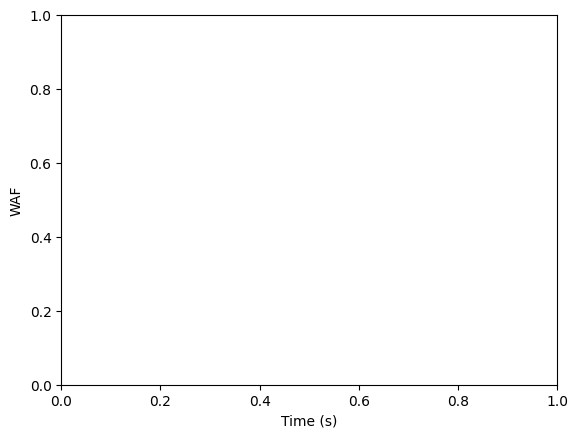

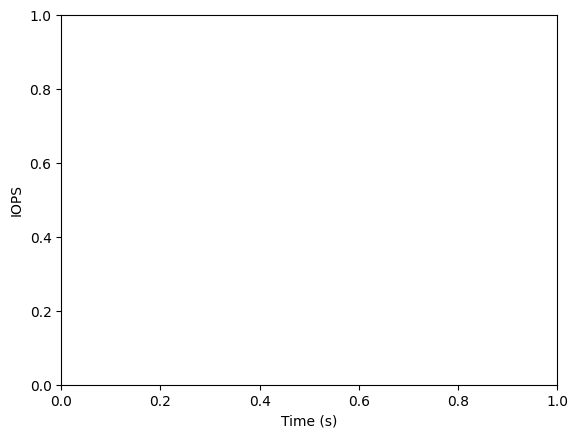

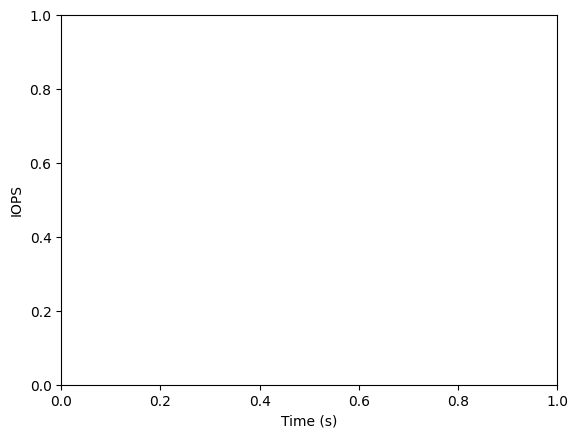

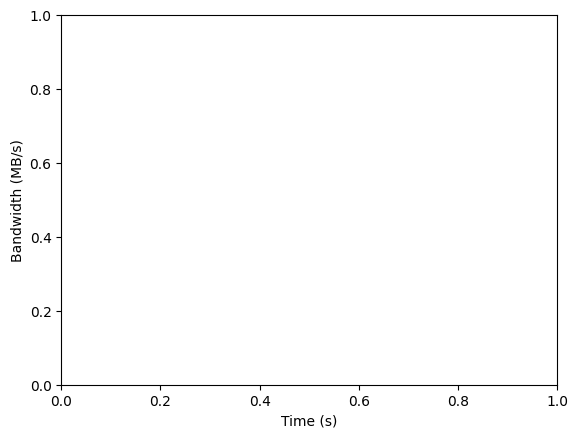

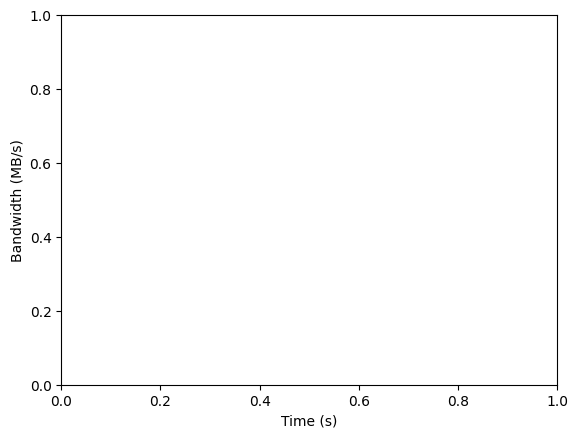

<Figure size 640x480 with 0 Axes>

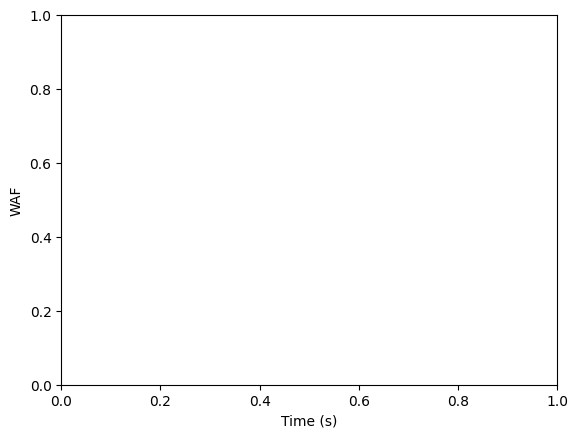

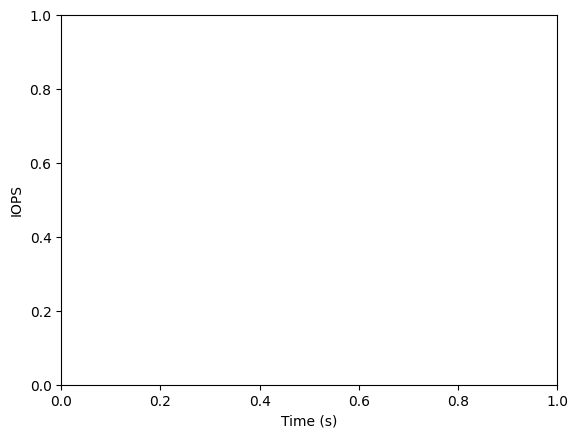

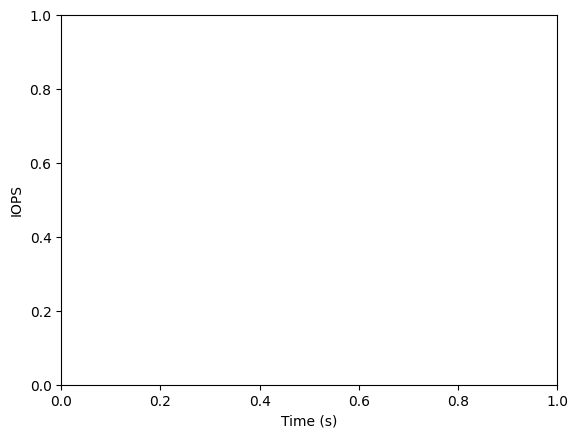

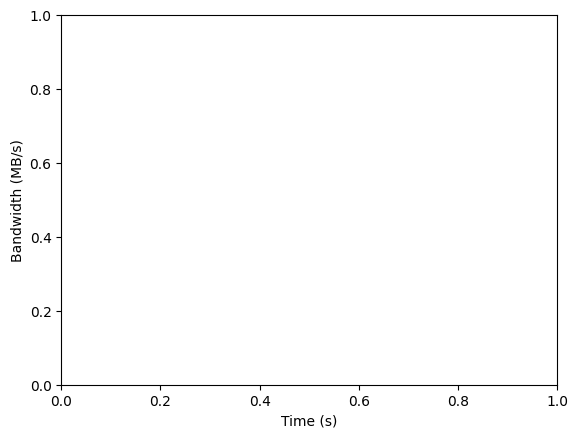

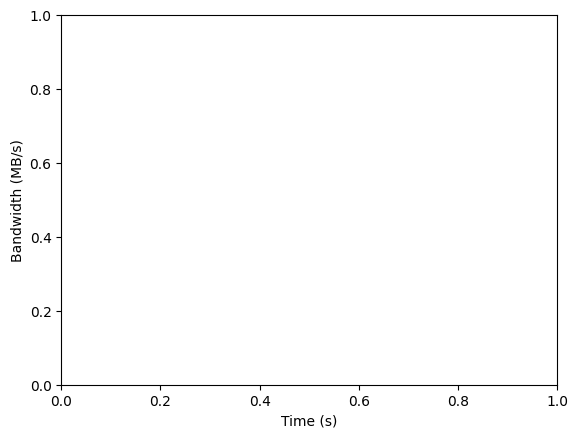

<Figure size 640x480 with 0 Axes>

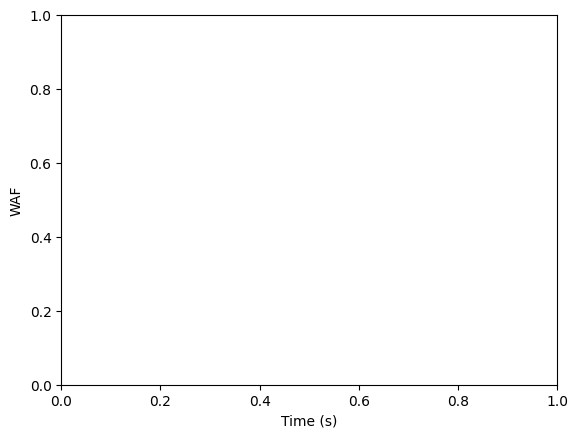

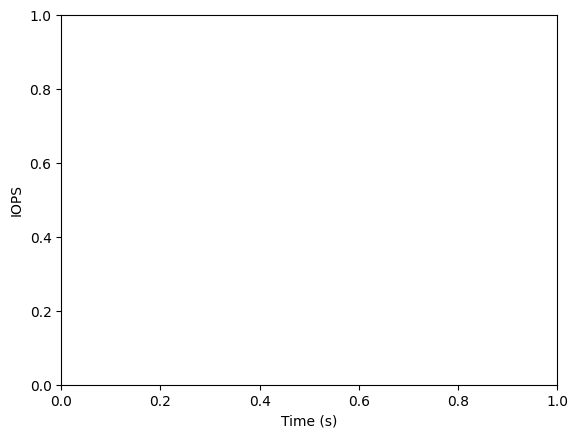

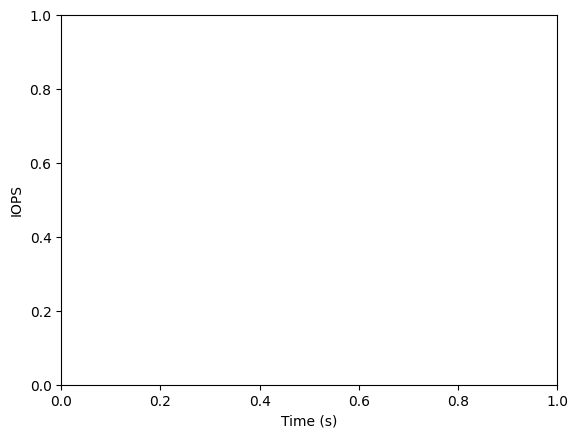

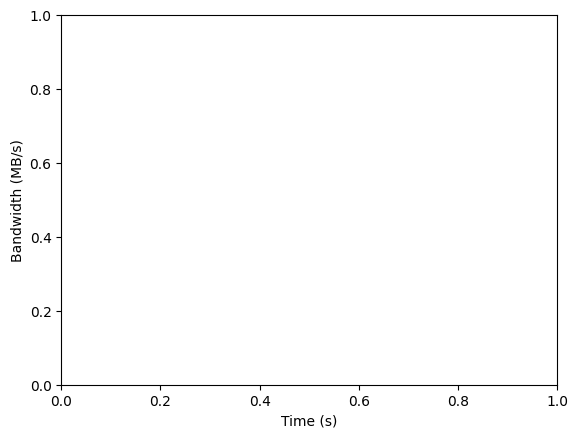

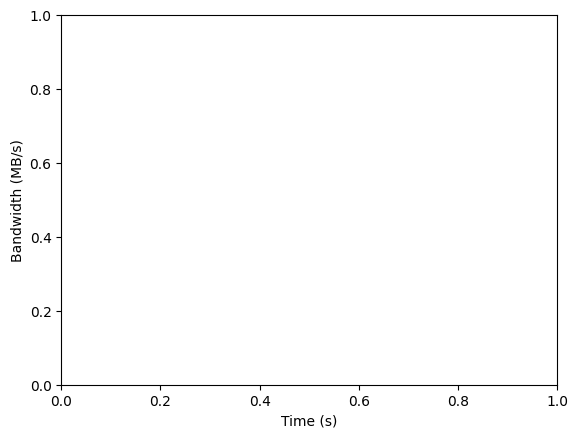

<Figure size 640x480 with 0 Axes>

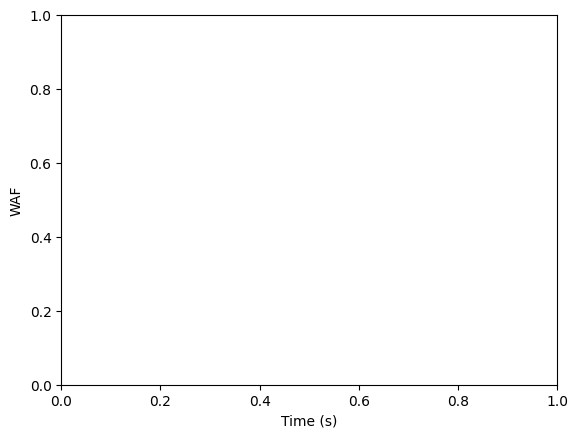

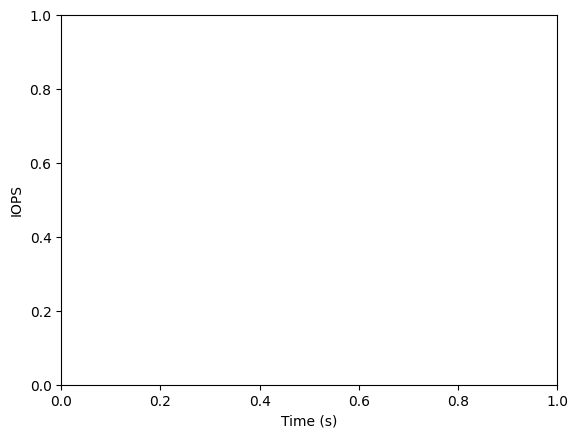

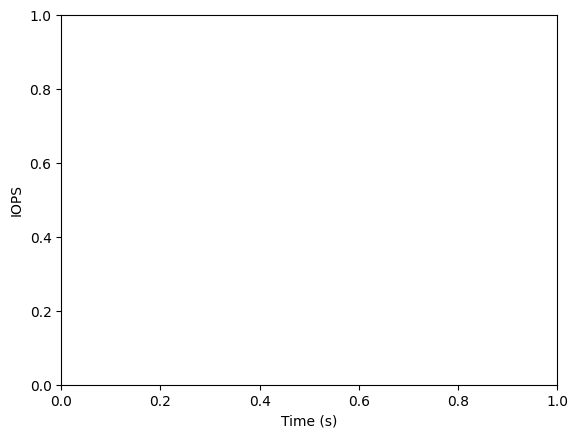

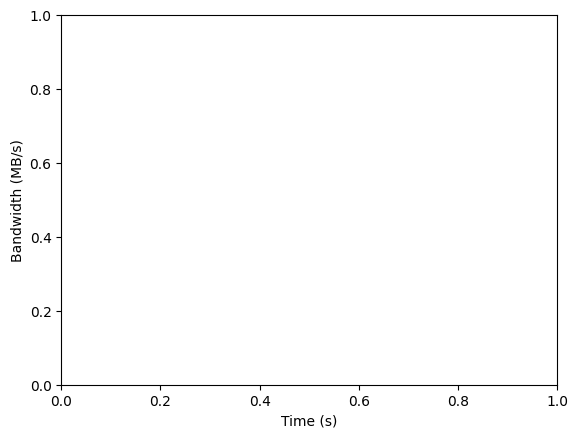

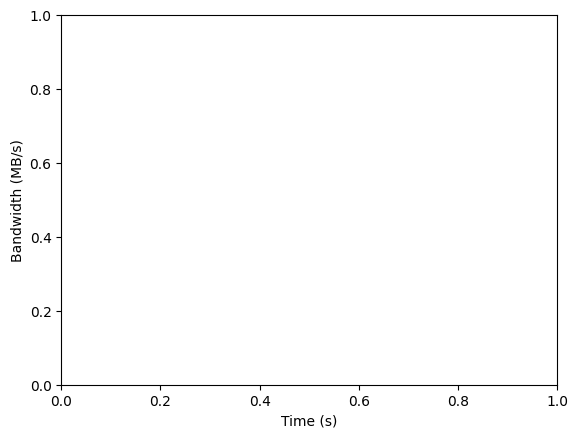

<Figure size 640x480 with 0 Axes>

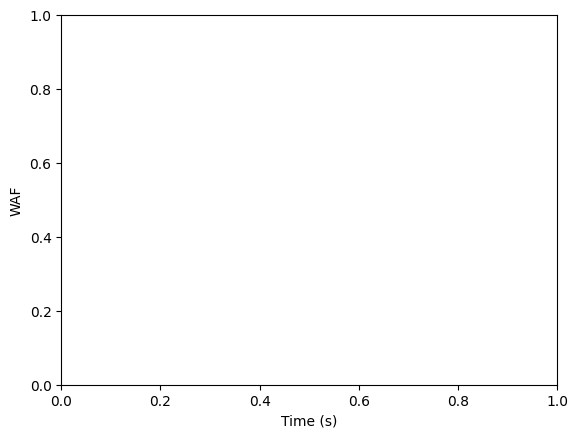

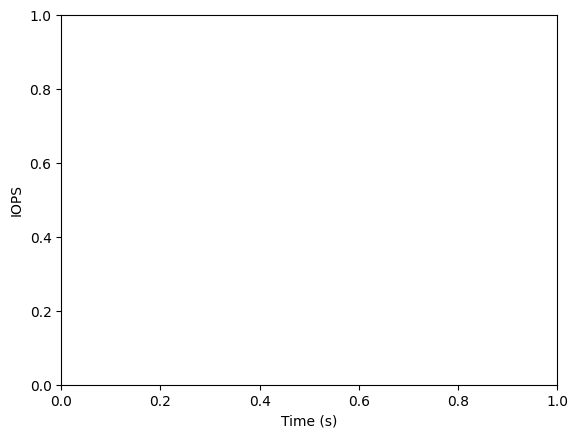

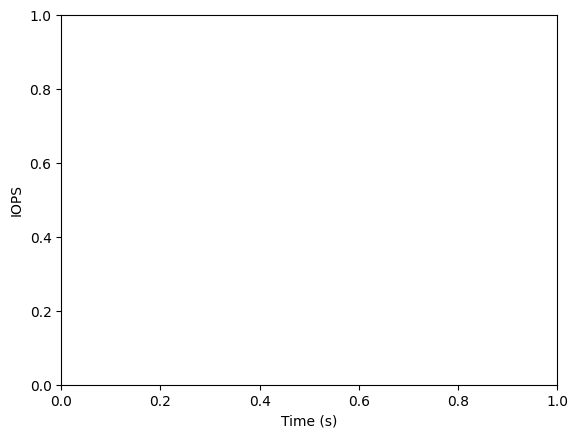

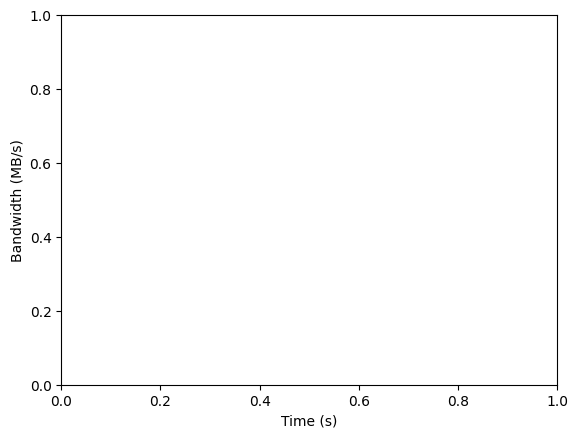

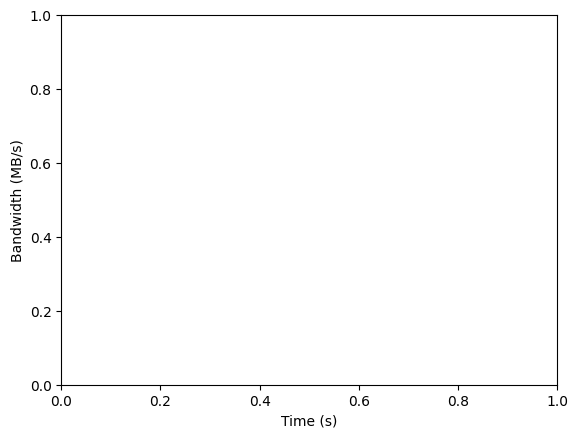

<Figure size 640x480 with 0 Axes>

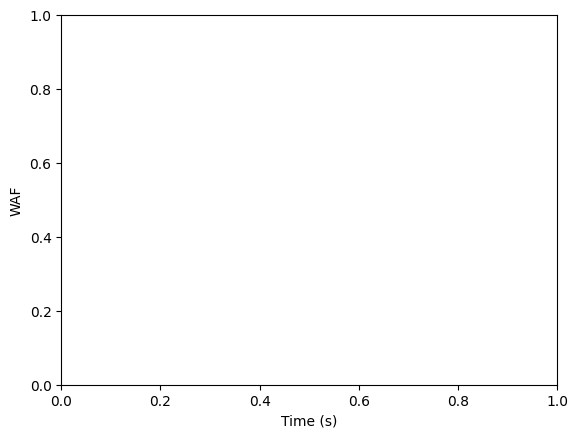

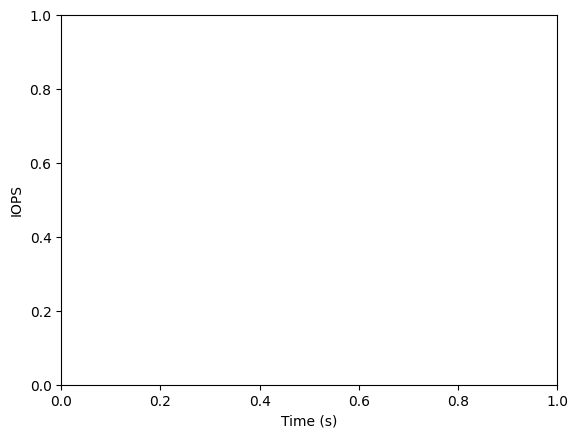

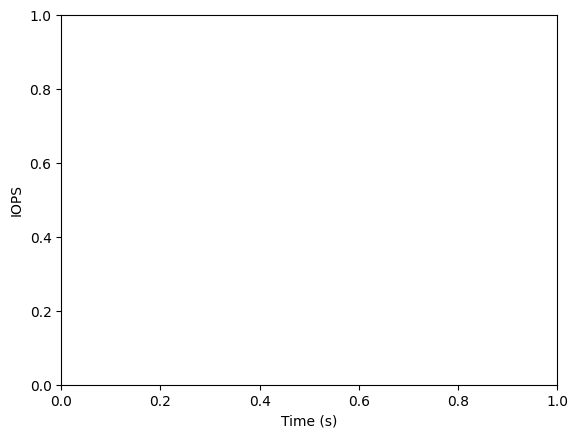

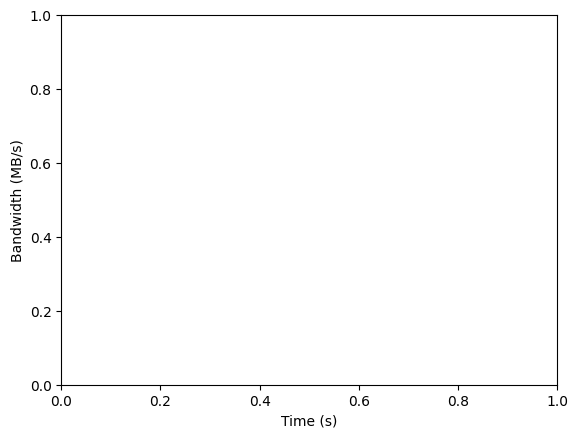

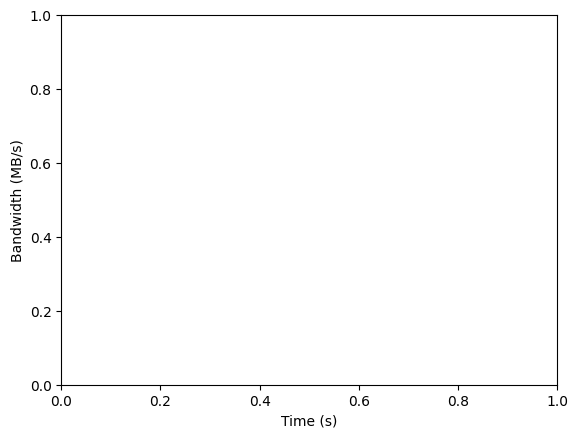

<Figure size 640x480 with 0 Axes>

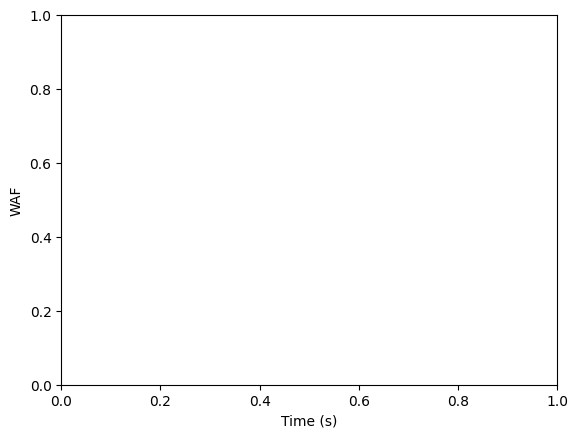

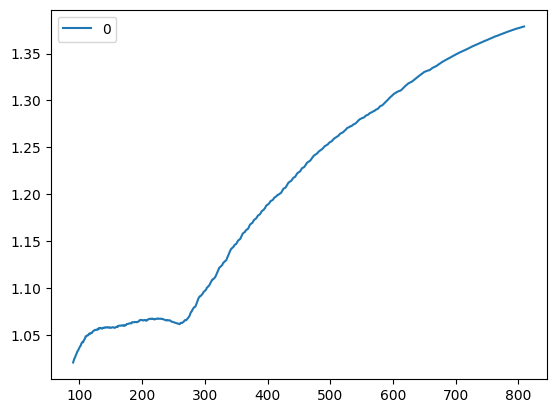

In [11]:
result_dics = []
for result_f in result_files:
    try:
        core_result_f = dump_core_log(result_f, section=3)
        f = result_f.split(os.sep)[-1].split(".job.out")[0]
        plot_dir = "/home/xgj/spdk/exp-0219/plot/result"
        if not os.path.exists(plot_dir):
            os.mkdir(plot_dir)
        save_dir = os.path.join(plot_dir, f)
        for metric in ["IOPS", "bw"]:
            plot_io(core_result_f, metric, save_dir)
        plot_stat_waf(core_result_f, save_dir)
        _, final_waf = plot_overall_waf(core_result_f, save_dir)
        iops, bw, latency = extract_fio(result_f)
        result_dics.append({
            "param": f,
            "IOPS": iops,
            "BW(MB/S)": bw,
            "latency": latency,
            "final_waf": final_waf,
        })
    except Exception as e:
        print(f"Error: {e}")
    finally:
        os.remove(core_result_f)
result_df = pd.DataFrame(result_dics)
print(result_df)
result_df.to_csv(os.path.join("/home/xgj/spdk/exp-0219/result", f"{"-".join(keywords)}.csv"), sep="\t")